# モジュールをインポート

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# 学習歴史を読み込み

In [2]:
results_path = "keras_2019_12_18_14_24"
results_path = "./results/" + results_path 
with open(results_path + "/train_hist", "rb") as file:
    history = pickle.load(file)

In [3]:
history.keys()

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])

# 学習正解率を描画

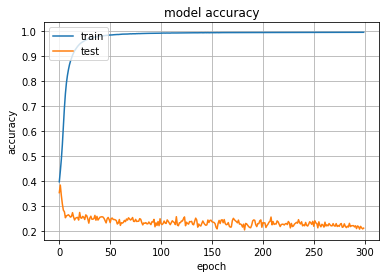

In [4]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# 学習損失を描画

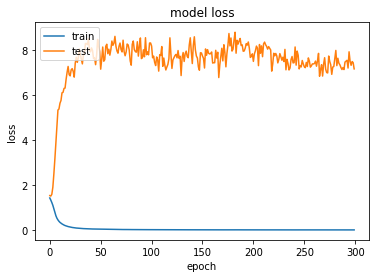

In [5]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 検証データセットを読み込み

In [ ]:
dataset_dir = "./dataset/preprocessed_dataset/"
result_dir = "./results/"

with open(dataset_dir+"82_108_shuffle_dataset_3D_win_10.pkl", "rb") as fp:
    X_valid = pickle.load(fp)
with open(dataset_dir+"82_108_shuffle_labels_3D_win_10.pkl", "rb") as fp:
    y_valid = pickle.load(fp)
X_valid = X_valid.reshape(-1, 10, 10, 11, 1)
print("Dataset shape:", X_valid.shape)
print("Labels shape:", y_valid.shape)

# ラベルエンコーディング

In [ ]:

with open(results_path + "/ohe", "rb") as file:
    ohe = pickle.load(file)

In [ ]:
y_valid = ohe.transform(y_valid.reshape(-1, 1))

In [ ]:
y_valid

In [ ]:
print("Test dataset shape:", X_valid.shape)
print("Test label shape:", y_valid.shape)

# モデルを定義

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model(results_path + "/model/model.h5")

In [ ]:
dropout_prob = 0.5
n_labels = y_valid.shape[1]
training_epochs = 10
batch_size = 300
learning_rate = 1e-4

# モデルの確認

In [ ]:
model.summary()

# テストデータを分類

In [ ]:
y_pred = model.predict(X_valid, batch_size=300, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

In [ ]:
y_pred = ohe.inverse_transform(y_pred)

In [ ]:
y_pred

In [ ]:
y_pred = ohe.transform(y_pred)

In [ ]:
y_pred

In [ ]:
y_valid

# 精度と正解率の曲線

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

precision = dict()
recall = dict()
for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_valid[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# 分類結果

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

In [ ]:
ohe.categories_

In [ ]:
print("検証正解率：", history["val_acc"][-1])

In [ ]:
from sklearn.metrics import accuracy_score
print("テスト正解率：", accuracy_score(y_valid, y_pred))